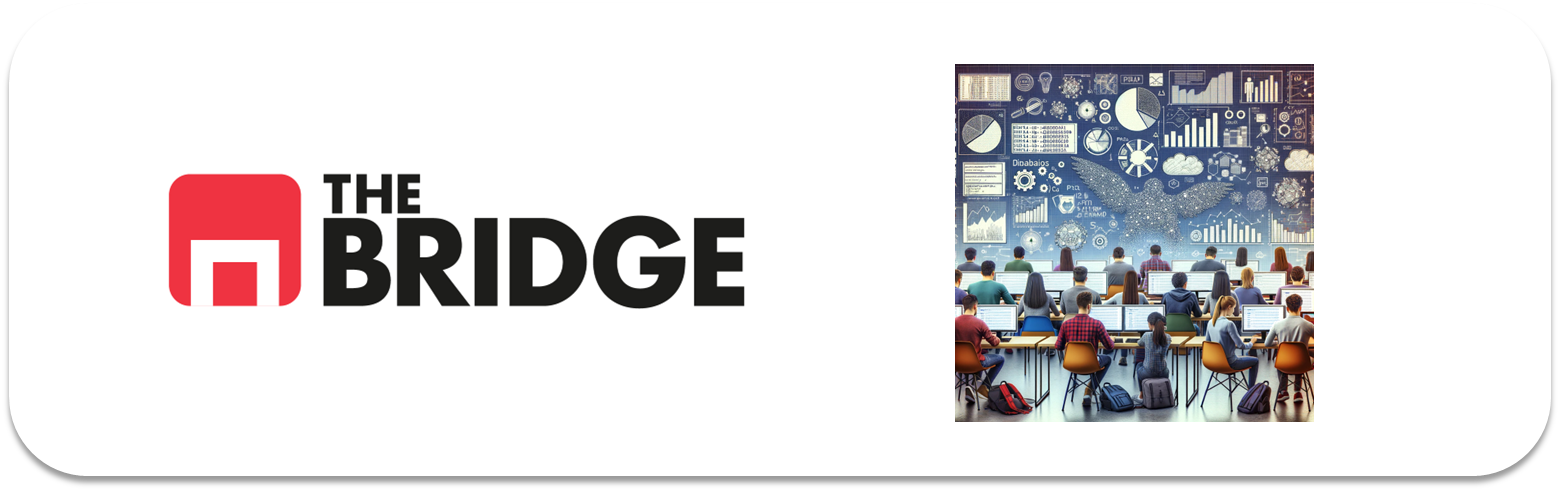

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



- Pasos 1 a 4:

In [58]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", delimiter='|')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


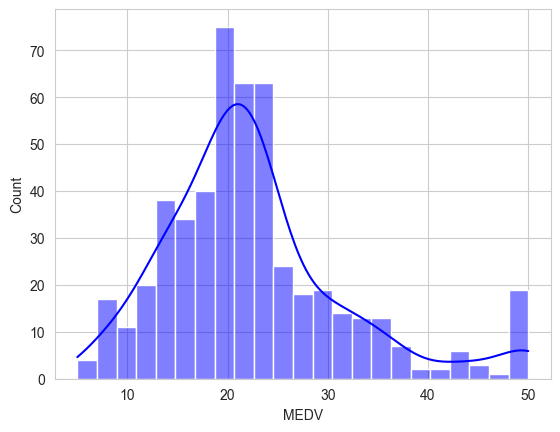

In [59]:
sns.histplot(df['MEDV'], color='Blue', kde = True)
plt.show()

In [60]:
# Features
X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]

# Target
y = df['MEDV']

In [61]:
target = 'MEDV'

In [62]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [63]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [64]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 13)
(404, 12)
(102, 12)
(404,)
(102,)


In [65]:
df.corr(numeric_only = True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [66]:
corr = train_set.corr(numeric_only = True)
corr[target].sort_values(ascending = False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

<Axes: >

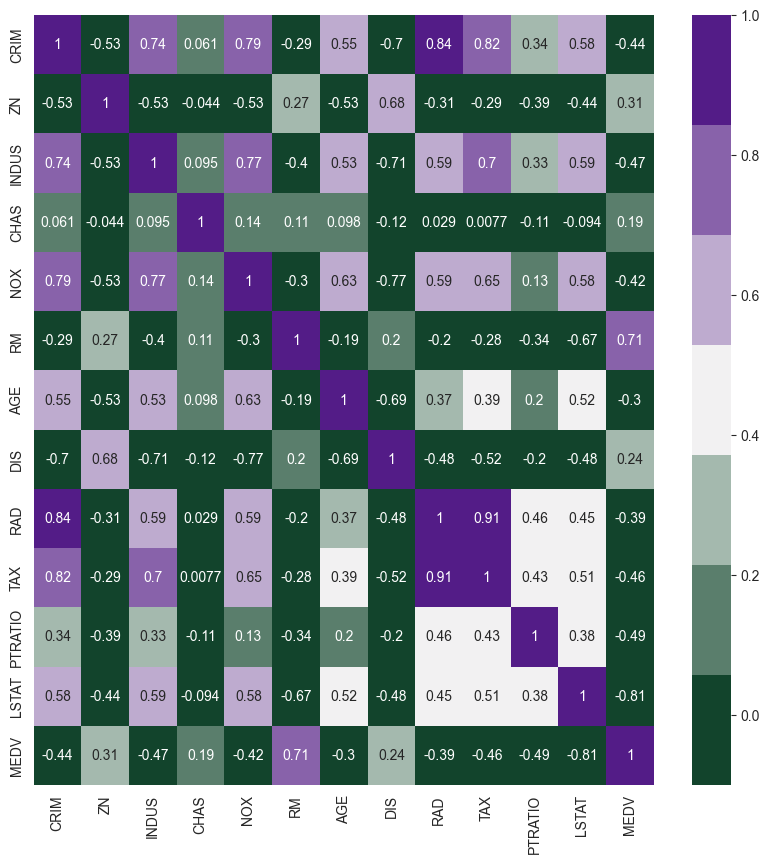

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True)

- Espero que RM sea la variable que más influya en MEDV (precio), seguido de ZN
- Cojo como número criterio para variables 0,31 (elimino DIS y ZN)
- CHAS es categórica
- Para colinearidad, cojo como criterio 0,7 (elimino TAX porque tiene 0,91 con RAD, y NOX porque tiene 0,77 con INDUS)

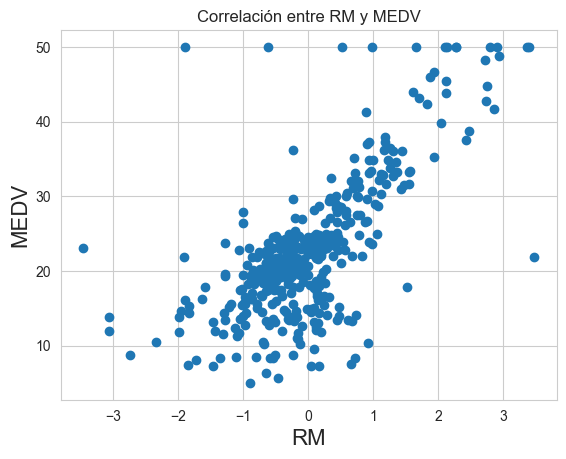

In [87]:
plt.scatter(train_set['RM'], train_set['MEDV'])
plt.xlabel('RM', fontsize=16)
plt.ylabel('MEDV', fontsize=16)
plt.title('Correlación entre RM y MEDV')
plt.show()

In [69]:
features = ["LSTAT", "RM", "PTRATIO", "INDUS", "CRIM", "AGE"]

- Proceso las numéricas

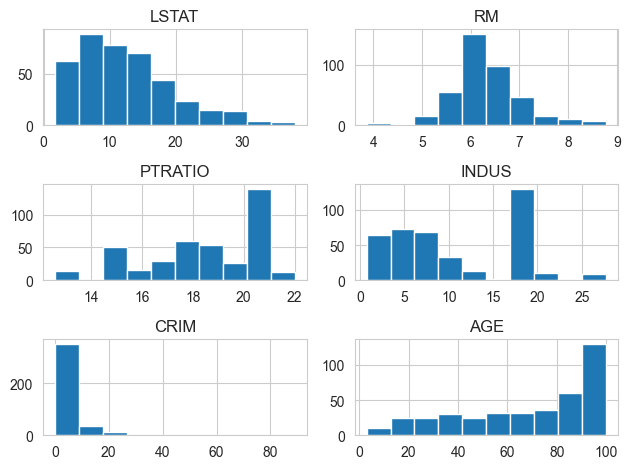

In [71]:
train_set[features].hist()
plt.tight_layout()

Hay varias con una distribución mala, hay que transformarlas

- Transformamos el set de train

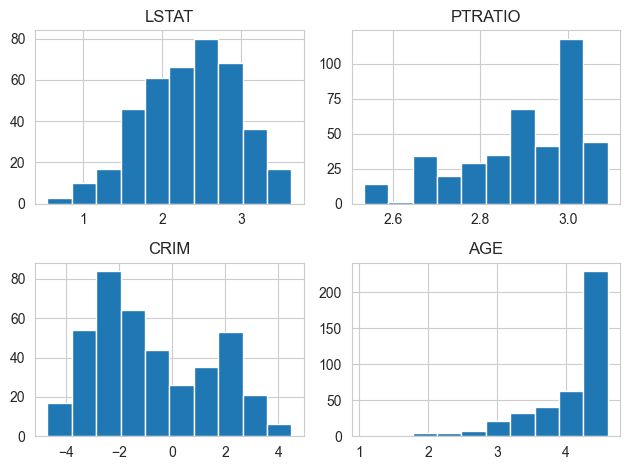

In [72]:
features_a_transformar = ["LSTAT","PTRATIO","CRIM","AGE"]
for feature in features_a_transformar:
    train_set[feature] = train_set[feature].apply(np.log)

train_set[features_a_transformar].hist()
plt.tight_layout()

- Transformamos el set de test

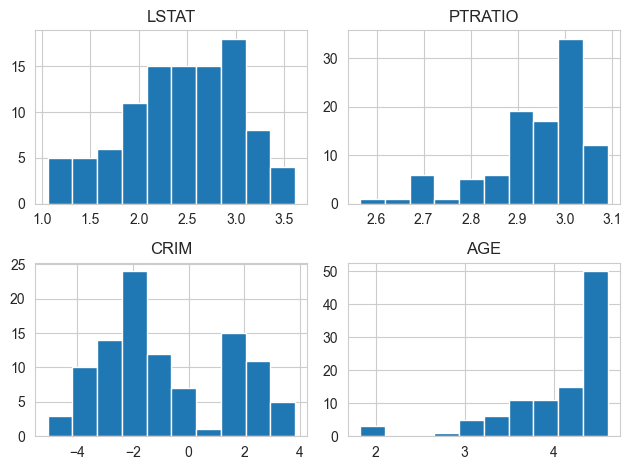

In [73]:
features_a_transformar = ["LSTAT","PTRATIO","CRIM","AGE"]
for feature in features_a_transformar:
    test_set[feature] = test_set[feature].apply(np.log)

test_set[features_a_transformar].hist()
plt.tight_layout()

- Se realiza el proceso de estandarización:

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_set[features])

StandardScaler()

In [75]:
scaler.scale_

array([0.60168758, 0.70857318, 0.12874714, 6.88607935, 2.14475377,
       0.60964974])

In [76]:
train_set[features] = scaler.transform(train_set[features])
test_set[features] = scaler.transform(test_set[features])

In [77]:
X_train = train_set[features]
y_train = train_set[target]

- Comenzamos con la regresión lineal:

In [78]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [79]:
lr.coef_

array([-6.03874132,  2.21645417, -1.67667716,  0.04575848, -0.04580017,
        1.10129837])

In [81]:
from sklearn.metrics import median_absolute_error, mean_squared_error
pred_train = lr.predict(X_train)

print("MAE:", median_absolute_error(y_train, pred_train))
print("RMSE:", mean_squared_error(y_train, pred_train, squared = False))
print("R^2:", lr.score(X_train, y_train))

MAE: 2.8350113772807433
RMSE: 4.677936499131406
R^2: 0.7481036896863951


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [82]:
X_test = test_set[features]
y_test = test_set[target]

In [83]:
from sklearn.metrics import median_absolute_error, mean_squared_error
pred_test = lr.predict(X_test)

print("MAE:", median_absolute_error(y_test, pred_test))
print("RMSE:", mean_squared_error(y_test, pred_test, squared = False))
print("R^2:", lr.score(X_test, y_test))

MAE: 1.826613884787216
RMSE: 4.538237239061544
R^2: 0.7191526694732402


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Prediction')

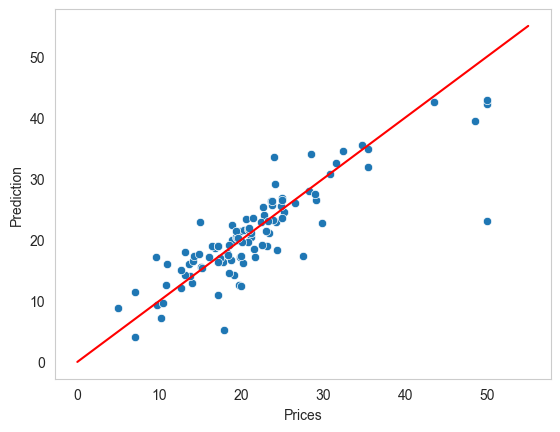

In [85]:
sns.scatterplot(x=y_test, y= pred_test)
plt.plot([0,55],[0,55],'red')
plt.grid()
plt.xlabel('Prices')
plt.ylabel('Prediction')

In [86]:
ridge_reg = Ridge(alpha = 1000)
lasso_reg = Lasso(alpha = 1000)
elastic_reg = ElasticNet(alpha = 10, l1_ratio = 0.5)

for nombre, model in zip(["Ridge","Lasso","ElasticNet"],[ridge_reg, lasso_reg, elastic_reg]):

    model.fit(X_train,y_train)
    print("Modelo:", nombre)

    print("TRAIN:")
    pred_train  = model.predict(X_train)
    print("MAE:", median_absolute_error(y_train, pred_train))
    print("RMSE:", mean_squared_error(y_train, pred_train, squared = False))
    print("R^2:", lr.score(X_train, y_train))

    print("TEST:")
    pred_test = model.predict(X_test)
    print("MAE:", median_absolute_error(y_test, pred_test))
    print("RMSE:", mean_squared_error(y_test, pred_test, squared = False))
    print("R^2:", lr.score(X_test, y_test))

Modelo: Ridge
TRAIN:
MAE: 3.278846761191632
RMSE: 6.43965955030684
R^2: 0.7481036896863951
TEST:
MAE: 2.741517309787808
RMSE: 5.847889537448456
R^2: 0.7191526694732402
Modelo: Lasso
TRAIN:
MAE: 5.0465346534653435
RMSE: 9.320590315691252
R^2: 0.7481036896863951
TEST:
MAE: 4.346534653465344
RMSE: 8.662876564628665
R^2: 0.7191526694732402
Modelo: ElasticNet
TRAIN:
MAE: 4.75429806174906
RMSE: 8.835333030383236
R^2: 0.7481036896863951
TEST:
MAE: 3.86026991945047
RMSE: 8.202127092729409
R^2: 0.7191526694732402


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_reg

In [94]:
ridge = Ridge(alpha = 5)

ridge.fit(X_train,y_train)
print("Modelo Ridge:")

print("TRAIN:")
pred_train  = ridge.predict(X_train)
print("MAE:", median_absolute_error(y_train, pred_train))
print("RMSE:", mean_squared_error(y_train, pred_train, squared = False))
print("R^2:", lr.score(X_train, y_train))

print("TEST:")
pred_test = ridge.predict(X_test)
print("MAE:", median_absolute_error(y_test, pred_test))
print("RMSE:", mean_squared_error(y_test, pred_test, squared = False))
print("R^2:", lr.score(X_test, y_test))

Modelo Ridge:
TRAIN:
MAE: 2.7787708415221157
RMSE: 4.679231292090357
R^2: 0.7481036896863951
TEST:
MAE: 1.8599232654186615
RMSE: 4.545157419529062
R^2: 0.7191526694732402


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [95]:
lasso = Lasso(alpha = 5)

lasso.fit(X_train,y_train)
print("Modelo Lasso:")

print("TRAIN:")
pred_train  = lasso.predict(X_train)
print("MAE:", median_absolute_error(y_train, pred_train))
print("RMSE:", mean_squared_error(y_train, pred_train, squared = False))
print("R^2:", lr.score(X_train, y_train))

print("TEST:")
pred_test = lasso.predict(X_test)
print("MAE:", median_absolute_error(y_test, pred_test))
print("RMSE:", mean_squared_error(y_test, pred_test, squared = False))
print("R^2:", lr.score(X_test, y_test))

Modelo Lasso:
TRAIN:
MAE: 3.709092418000175
RMSE: 7.368553098806767
R^2: 0.7481036896863951
TEST:
MAE: 2.91621820680027
RMSE: 6.711830566487762
R^2: 0.7191526694732402


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [96]:
elastic = ElasticNet(alpha = 5, l1_ratio = 0.5)

elastic.fit(X_train,y_train)
print("Modelo Elastic Net:")

print("TRAIN:")
pred_train  = elastic.predict(X_train)
print("MAE:", median_absolute_error(y_train, pred_train))
print("RMSE:", mean_squared_error(y_train, pred_train, squared = False))
print("R^2:", lr.score(X_train, y_train))

print("TEST:")
pred_test = elastic.predict(X_test)
print("MAE:", median_absolute_error(y_test, pred_test))
print("RMSE:", mean_squared_error(y_test, pred_test, squared = False))
print("R^2:", lr.score(X_test, y_test))

Modelo Elastic Net:
TRAIN:
MAE: 3.922378392309959
RMSE: 7.510744181740606
R^2: 0.7481036896863951
TEST:
MAE: 2.8709614892919593
RMSE: 6.933768099649882
R^2: 0.7191526694732402


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Es mejor el modelo Ridge para este set de datos